In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
metadata = pd.read_csv('Metadata_FecalMG.csv', index_col=0,delimiter=",")
#metadata = metadata.dropna()
metadata = pd.DataFrame(metadata)
metadata

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
Patient_id,,,,,,,,
10021,Stage_I_II,I,57,M,26.8809517,130,993,Left colon
10023,Healthy,-,65,M,26.5625,660,0,-
10025,Healthy,-,40,M,25,400,993,-
10029,Healthy,-,67,F,20.17325264,0,0,-
10031,Healthy,-,77,M,24.4646016,300,813,-
...,...,...,...,...,...,...,...,...
12276,Healthy,-,46,M,21.79944511,0,430,-
12340,Healthy,-,59,M,26.53375883,0,989.9,-
12370,Healthy,-,65,F,18.25631871,0,0,-


In [34]:
stage_mapping = {
    'Stage_I_II': 'Early Stage',
    'Stage_III_IV': 'Late Stage',
}

metadata['Group'] = metadata['Group'].replace(stage_mapping)
SG_FecalMG_BA = metadata[metadata['Group'] != 'Healthy']

gender_mapping = {
    'M': 'Male',
    'F': 'Female',
}

location_mapping = {
    '-': 'Healthy',
    'Left colon and Right colon': 'Others',
    'Left colon and Rectum': 'Others',
    'Rectum and Left colon': 'Others',
    'Rectum, Left colon and Right colon': 'Others',
}

metadata['Group'] = metadata['Group'].replace(stage_mapping)
metadata['Gender'] = metadata['Gender'].replace(gender_mapping)
metadata['Tumor location'] = metadata['Tumor location'].replace(location_mapping)

metadata

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
Patient_id,,,,,,,,
10021,Early Stage,I,57,Male,26.8809517,130,993,Left colon
10023,Healthy,-,65,Male,26.5625,660,0,Healthy
10025,Healthy,-,40,Male,25,400,993,Healthy
10029,Healthy,-,67,Female,20.17325264,0,0,Healthy
10031,Healthy,-,77,Male,24.4646016,300,813,Healthy
...,...,...,...,...,...,...,...,...
12276,Healthy,-,46,Male,21.79944511,0,430,Healthy
12340,Healthy,-,59,Male,26.53375883,0,989.9,Healthy
12370,Healthy,-,65,Female,18.25631871,0,0,Healthy


In [35]:
metadata.columns

Index(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'],
      dtype='object')

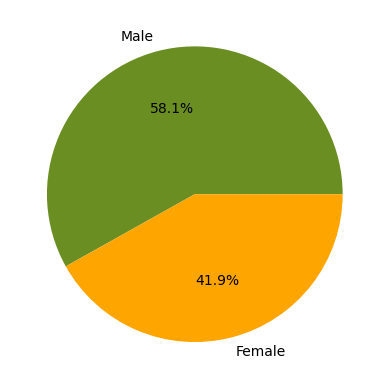

In [36]:
gender_counts = metadata['Gender'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values
colors = ['olivedrab','orange']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

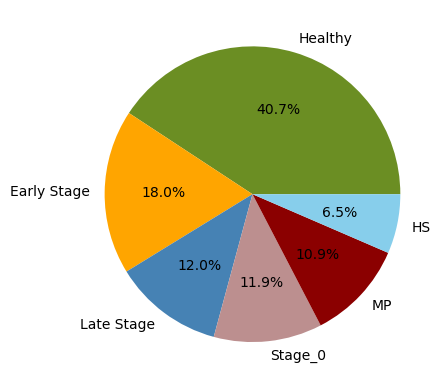

In [39]:
Group_counts = metadata['Group'].value_counts()

labels = Group_counts.index
sizes = Group_counts.values
colors = ['olivedrab','orange','steelblue', 'rosybrown', 'darkred', 'skyblue']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

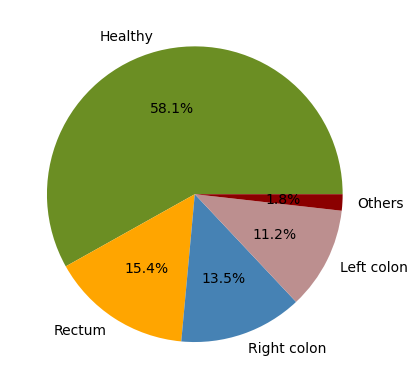

In [40]:
TumorSite_counts = metadata['Tumor location'].value_counts()

labels = TumorSite_counts.index
sizes = TumorSite_counts.values
colors = ['olivedrab','orange','steelblue', 'rosybrown', 'darkred']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

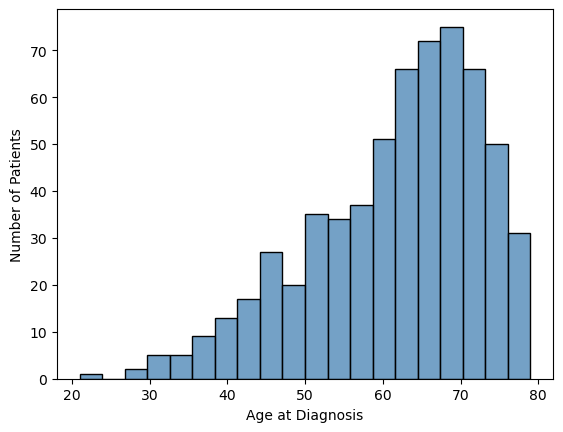

In [41]:
sns.histplot(metadata['Age'], bins=20, color='steelblue')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Number of Patients')
plt.show()